## Some Ideas on the programming challenge

- https://pillow.readthedocs.io/en/3.2.x/reference/Image.html#PIL.Image.Image.convert

- using code in class, we know how to get to edge images
- But how do we figure out if it's a brick/ball or cylinder from those edge images?

---

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
import glob

In [11]:
im_paths=glob.glob('../data/easy/*/*.jpg')

In [64]:
i=0
im=imread(im_paths[i])

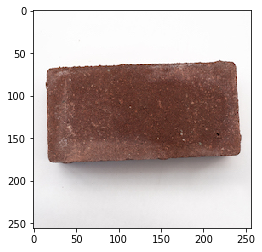

In [65]:
imshow(im)

In [66]:
def convert_to_grayscale(im): return np.mean(im, axis = 2)

In [67]:
def filter_2d(im, kernel):
    '''
    Filter an image by taking the dot product of each 
    image neighborhood with the kernel matrix.
    Args:
    im = (H x W) grayscale floating point image
    kernel = (M x N) matrix, smaller than im
    Returns: 
    (H-M+1 x W-N+1) filtered image.
    '''

    M = kernel.shape[0] 
    N = kernel.shape[1]
    H = im.shape[0]
    W = im.shape[1]
    
    filtered_image = np.zeros((H-M+1, W-N+1), dtype = 'float64')
    
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            image_patch = im[i:i+M, j:j+N]
            filtered_image[i, j] = np.sum(np.multiply(image_patch, kernel))
            
    return filtered_image

In [68]:
#Implement Sobel kernels as numpy arrays
Kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Ky = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

In [69]:
gray = convert_to_grayscale(im/255.)
Gx = filter_2d(gray, Kx) #Find vertical edges
Gy = filter_2d(gray, Ky) #Find horizontal edges
G = np.sqrt(Gx**2+Gy**2)
G_direction = np.arctan2(Gy, Gx)

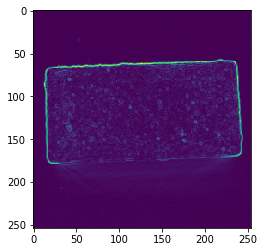

In [70]:
imshow(G)

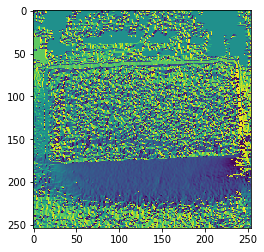

In [71]:
imshow(G_direction)

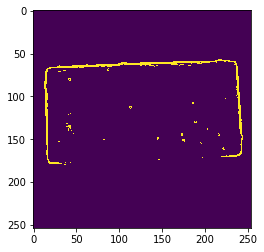

In [72]:
imshow(G>0.75)

In [73]:
G>0.75

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [77]:
direction_of_edges=G_direction[G>0.5]

In [78]:
len(direction_of_edges)

2095

Text(0.5, 1.0, 'Direction of edges of brick!')

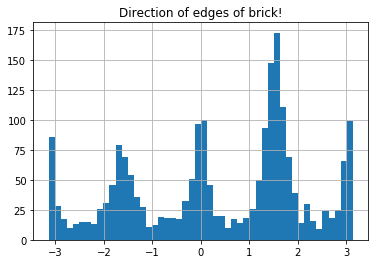

In [79]:
plt.hist(direction_of_edges, 50);
grid(1); title('Direction of edges of brick!')

---

In [50]:
im=imread('../data/easy/ball/ball_1.jpg')
gray = convert_to_grayscale(im/255.)
Gx = filter_2d(gray, Kx) #Find vertical edges
Gy = filter_2d(gray, Ky) #Find horizontal edges
G = np.sqrt(Gx**2+Gy**2)
G_direction = np.arctan2(Gy, Gx)
direction_of_edges=G_direction[G>0.5]

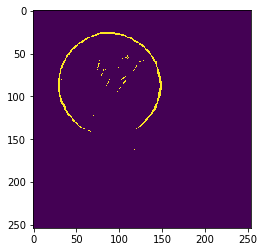

In [54]:
imshow(G>0.5)

Text(0.5, 1.0, 'Direction of edges of ball!')

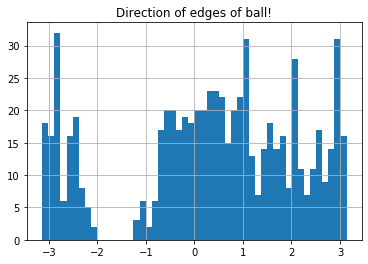

In [55]:
plt.hist(direction_of_edges, 50);
grid(1); title('Direction of edges of ball!')

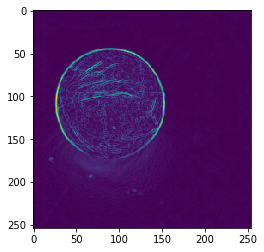

In [48]:
imshow(G)

In [87]:
thresh=0.5

In [89]:
im_paths=glob.glob('../data/hard/*/*.jpg')

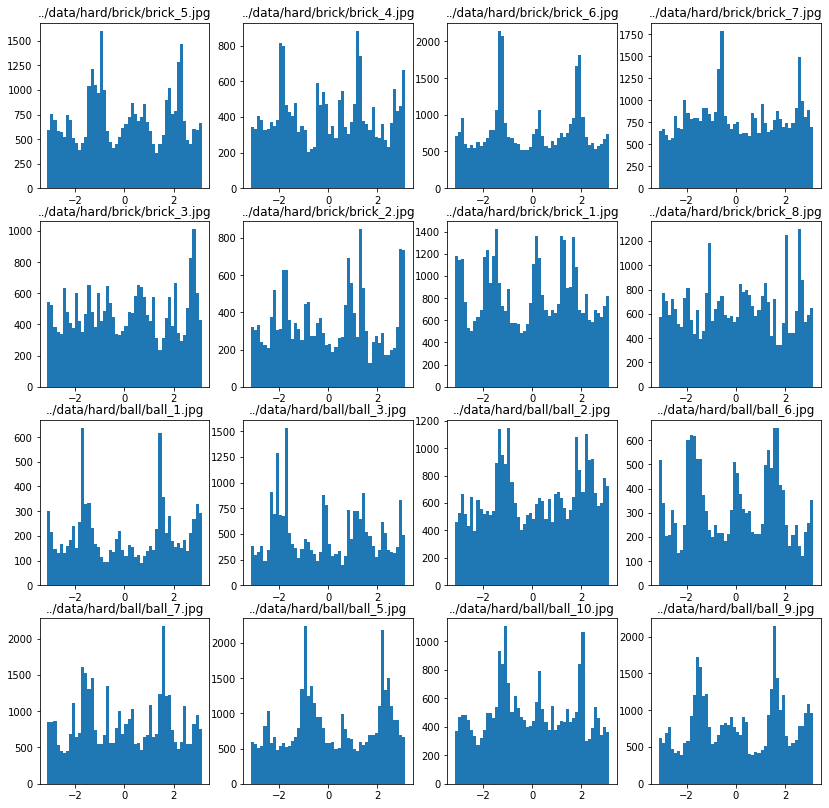

In [93]:
fig=figure(0, (14,14))
for i in range(16):
    fig.add_subplot(4,4,i+1)
    im=imread(im_paths[i])
    gray = convert_to_grayscale(im/255.)
    Gx = filter_2d(gray, Kx) #Find vertical edges
    Gy = filter_2d(gray, Ky) #Find horizontal edges
    G = np.sqrt(Gx**2+Gy**2)
    G_direction = np.arctan2(Gy, Gx)
    direction_of_edges=G_direction[G>thresh]
    plt.hist(direction_of_edges, 50);
    title(im_paths[i])

In [94]:
im_paths=glob.glob('../data/easy/*/*.jpg')

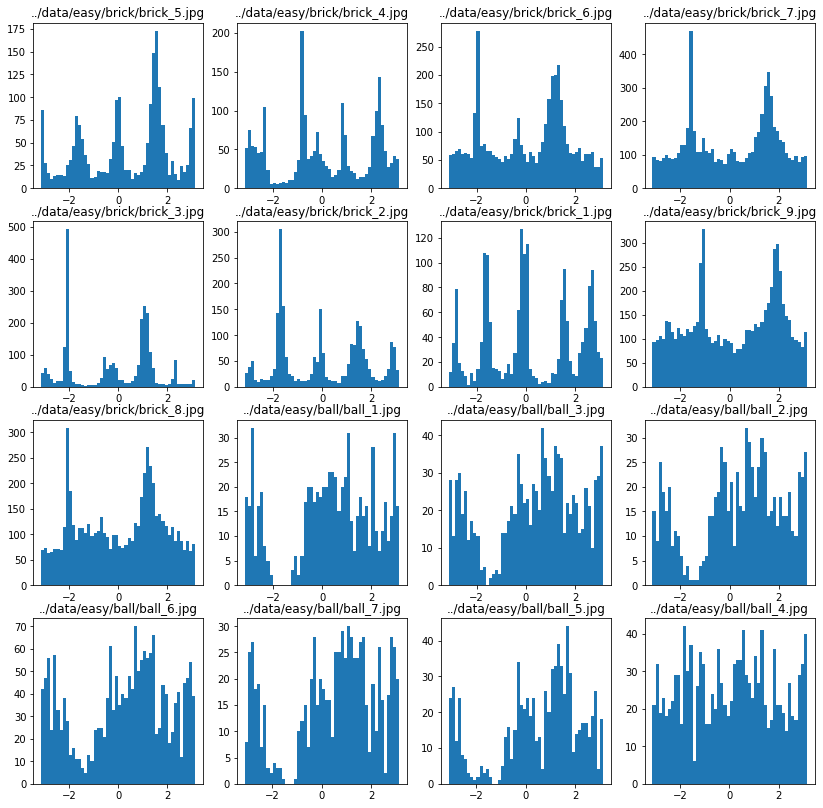

In [95]:
fig=figure(0, (14,14))

for i in range(16):
    fig.add_subplot(4,4,i+1)
    im=imread(im_paths[i])
    gray = convert_to_grayscale(im/255.)
    Gx = filter_2d(gray, Kx) #Find vertical edges
    Gy = filter_2d(gray, Ky) #Find horizontal edges
    G = np.sqrt(Gx**2+Gy**2)
    G_direction = np.arctan2(Gy, Gx)
    direction_of_edges=G_direction[G>thresh]
    plt.hist(direction_of_edges, 50);
    title(im_paths[i])